<a href="https://colab.research.google.com/github/Bauwaniy/ML/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset was collected during 60 days, this is a real database of a brazilian logistics company. The dataset has twelve predictive attributes and a target that is the total of orders for daily treatment.

In [120]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

In [121]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv'


# Load CSV File 
data = pd.read_csv(file_name,  sep=';')
data.sample(5)


,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
32,4,3,435.304,181.149,67.884,267.342,281.227,0.000,64867,210508,177229,30514,616.453
39,1,6,275.076,121.697,109.888,131.165,175.777,20.057,37906,138536,85378,14020,416.830
25,2,4,148.139,85.310,35.576,79.997,123.253,5.377,59686,14188,67617,32319,238.826
15,4,4,122.736,124.256,56.167,78.101,112.724,0.000,52321,10046,62799,24233,246.992
49,3,6,130.465,105.273,57.467,88.462,109.132,19.323,27200,41713,59513,12260,255.061


In [122]:
data.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [123]:
data.shape

(60, 13)

Pre-Processing Data

In [124]:
#renaming the columns
data.columns = ['Week of the month','Day of the week ', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Total_orders']
data.head()


,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Total_orders
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [125]:
data.loc[data['Total_orders'].isna()]


,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Total_orders


In [126]:
data.shape

(60, 13)

In [127]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Week of the month,60.0,3.016667,1.282102,1.000,2.00000,3.0000,4.00000,5.000
Day of the week,60.0,4.033333,1.401775,2.000,3.00000,4.0000,5.00000,6.000
Non-urgent order,60.0,172.554933,69.505788,43.651,125.34800,151.0625,194.60650,435.304
Urgent order,60.0,118.920850,27.170929,77.371,100.88800,113.1145,132.10825,223.270
Order type A,60.0,52.112217,18.829911,21.826,39.45625,47.1665,58.46375,118.178
Order type B,60.0,109.229850,50.741388,25.125,74.91625,99.4820,132.17100,267.342
Order type C,60.0,139.531250,41.442932,74.372,113.63225,127.9900,160.10750,302.448
Fiscal sector orders,60.0,77.396133,186.502470,0.000,1.24325,7.8315,20.36075,865.000
traffic controller sector,60.0,44504.350000,12197.905134,11992.000,34994.25000,44312.0000,52111.75000,71772.000
Banking orders (1),60.0,46640.833333,45220.736293,3452.000,20130.00000,32527.5000,45118.75000,210508.000


In [128]:
data.dtypes

Week of the month              int64
Day of the week                int64
Non-urgent order             float64
Urgent order                 float64
Order type A                 float64
Order type B                 float64
Order type C                 float64
Fiscal sector orders         float64
traffic controller sector      int64
Banking orders (1)             int64
Banking orders (2)             int64
Banking orders (3)             int64
Total_orders                 float64
dtype: object

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Week of the month          60 non-null     int64  
 1   Day of the week            60 non-null     int64  
 2   Non-urgent order           60 non-null     float64
 3   Urgent order               60 non-null     float64
 4   Order type A               60 non-null     float64
 5   Order type B               60 non-null     float64
 6   Order type C               60 non-null     float64
 7   Fiscal sector orders       60 non-null     float64
 8   traffic controller sector  60 non-null     int64  
 9   Banking orders (1)         60 non-null     int64  
 10  Banking orders (2)         60 non-null     int64  
 11  Banking orders (3)         60 non-null     int64  
 12  Total_orders               60 non-null     float64
dtypes: float64(7), int64(6)
memory usage: 6.2 KB


In [130]:
# identify duplicates
duplicates = data[data.duplicated()]
duplicates

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Total_orders


In [131]:
data['Total_orders'].describe()

count     60.000000
mean     300.873317
std       89.602041
min      129.412000
25%      238.195500
50%      288.034500
75%      334.237250
max      616.453000
Name: Total_orders, dtype: float64

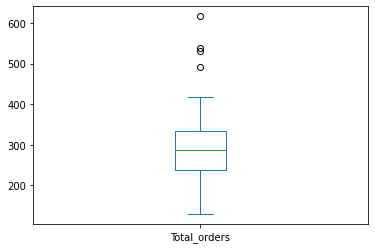

In [132]:
data['Total_orders'].plot(kind='box')

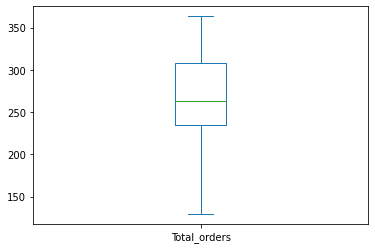

In [133]:
row_count =data.query("Total_orders > 400 and Total_orders < 700")
row_count

#droping row by row 
data.drop(labels=0, axis=0, inplace=True)
data.drop(labels=18, axis=0, inplace=True)
data.drop(labels=23, axis=0, inplace=True)
data.drop(labels=28, axis=0, inplace=True)
data.drop(labels=32, axis=0, inplace=True)
data.drop(labels=36, axis=0, inplace=True)
data.drop(labels=39, axis=0, inplace=True)
data.drop(labels=40, axis=0, inplace=True)
data.drop(labels=48, axis=0, inplace=True)

data['Total_orders'].plot(kind='box')

In [134]:
data.columns

Index(['Week of the month', 'Day of the week ', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Total_orders'],
      dtype='object')

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Total_orders
Week of the month,1.000000,-0.161690,0.464843,0.246829,0.400711,0.476639,0.087211,-0.003624,-0.190960,0.524624,0.266460,-0.268479,0.465348
Day of the week,-0.161690,1.000000,-0.345297,-0.544082,0.062423,-0.310091,-0.504771,-0.210365,-0.351950,0.095497,-0.520376,0.051276,-0.440667
Non-urgent order,0.464843,-0.345297,1.000000,0.254484,0.327672,0.832651,0.529125,0.102866,0.095142,0.598002,0.633650,0.084751,0.898465
Urgent order,0.246829,-0.544082,0.254484,1.000000,0.401629,0.346360,0.552614,0.101338,0.094208,0.018860,0.392444,0.089707,0.628957
Order type A,0.400711,0.062423,0.327672,0.401629,1.000000,0.290882,-0.054072,0.190050,-0.190739,0.544233,0.036173,0.241875,0.456158
Order type B,0.476639,-0.310091,0.832651,0.346360,0.290882,1.000000,0.223770,-0.107459,-0.056644,0.484953,0.641938,0.001648,0.831392
Order type C,0.087211,-0.504771,0.529125,0.552614,-0.054072,0.223770,1.000000,0.189314,0.328640,0.065220,0.423550,0.088419,0.649716
Fiscal sector orders,-0.003624,-0.210365,0.102866,0.101338,0.190050,-0.107459,0.189314,1.000000,0.261370,0.103851,0.066357,0.324171,0.089875
traffic controller sector,-0.190960,-0.351950,0.095142,0.094208,-0.190739,-0.056644,0.328640,0.261370,1.000000,-0.355825,0.081241,0.246518,0.079731
Banking orders (1),0.524624,0.095497,0.598002,0.018860,0.544233,0.484953,0.065220,0.103851,-0.355825,1.000000,-0.053748,0.155493,0.502413


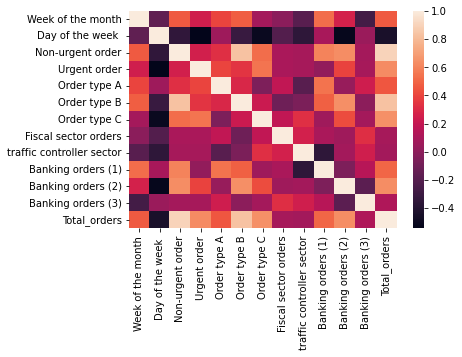

In [136]:
correlation_matrix = data[['Week of the month', 'Day of the week ', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Total_orders']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

# Identify X and y

In [137]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [138]:
data.columns


Index(['Week of the month', 'Day of the week ', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Total_orders'],
      dtype='object')

In [139]:
#'Day of the week ' has been removed from features as result of correlation matrix
X = [ 'Week of the month',  'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)' ]
    
y = ['Total_orders']
       
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.3, random_state=42)

In [140]:
X_train.head()

,Week of the month,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
44,2,123.302,94.315,48.081,72.826,109.157,12.447,43284,30138,52112,12632
41,2,165.472,102.530,46.295,96.870,124.837,0.000,48458,43112,72840,11304
21,1,123.286,103.551,47.331,72.444,116.529,9.467,48732,21196,47793,47574
57,5,193.534,109.639,58.378,142.382,102.687,274.000,28364,88404,91367,15003
16,4,144.051,158.408,51.660,92.272,164.948,6.421,47167,6440,91784,15973


In [141]:
y_train.head()

,Total_orders
44,230.064
41,268.002
21,236.304
57,303.447
16,308.880


# Linear Regression model

In [142]:
model = linear_model.LinearRegression()
print(model)

LinearRegression()


In [143]:
y_actual = 'Total_orders'
y_predict = 'prected_Total_orders'
correlation_matrix[y_actual].sort_values()

Day of the week             -0.440667
traffic controller sector    0.079731
Fiscal sector orders         0.089875
Banking orders (3)           0.120742
Order type A                 0.456158
Week of the month            0.465348
Banking orders (1)           0.502413
Urgent order                 0.628957
Banking orders (2)           0.635393
Order type C                 0.649716
Order type B                 0.831392
Non-urgent order             0.898465
Total_orders                 1.000000
Name: Total_orders, dtype: float64

In [144]:
model.fit(X_train[X], y_train[y_actual])

#Find model parameters (training)
coefficients = model.coef_
intercept = model.intercept_

result = y_test
result[y_predict] = model.predict(X_test[X])

#prediction
print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

#evaluation
mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

                     features  coefficients
0           Week of the month -1.423472e-12
1            Non-urgent order  6.349738e-15
2                Urgent order  6.018583e-14
3                Order type A  1.000000e+00
4                Order type B  1.000000e+00
5                Order type C  1.000000e+00
6        Fiscal sector orders -2.442132e-16
7   traffic controller sector -1.325708e-16
8          Banking orders (1) -2.818926e-17
9          Banking orders (2)  1.016982e-16
10         Banking orders (3) -2.542183e-16


Intercept = 9.379164112033322e-12
MSE: 3.3886536236614487e-23
RMSE: 5.821214326634477e-12
R2: 1.0


In [151]:
# Seelct variables
X = ['Week of the month']

#
# Fit
model.fit(X_train[X], y_train[y_actual])

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

            features  coefficients
0  Week of the month     19.328909


Intercept = 214.60057306226176


In [152]:
result = y_test
result[y_predict] = model.predict(X_test[X])

result['abs_difference'] = (result[y_actual] - result[y_predict]).abs()
result[[y_actual, y_predict, 'abs_difference']]

,Total_orders,prected_Total_orders,abs_difference
52,188.601,291.916207,103.315207
49,255.061,272.587299,17.526299
55,316.849,311.245116,5.603884
13,363.402,291.916207,71.485793
27,242.112,253.258390,11.146390
37,333.359,311.245116,22.113884
19,298.560,233.929482,64.630518
38,306.356,311.245116,4.889116
4,210.517,253.258390,42.741390
35,253.847,291.916207,38.069207


In [153]:
result['abs_difference'].describe()

count     16.000000
mean      33.247487
std       28.181151
min        4.300390
25%        9.933571
50%       24.496207
75%       45.190442
max      103.315207
Name: abs_difference, dtype: float64

In [154]:
mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

MSE: 1849.9365634353187
RMSE: 43.010888893805934
R2: 0.2385892270220915


# 2nd Iteration

In [155]:
y_actual = 'Total_orders'
y_predict = 'prected_Total_orders'
correlation_matrix[y_actual].sort_values()

Day of the week             -0.440667
traffic controller sector    0.079731
Fiscal sector orders         0.089875
Banking orders (3)           0.120742
Order type A                 0.456158
Week of the month            0.465348
Banking orders (1)           0.502413
Urgent order                 0.628957
Banking orders (2)           0.635393
Order type C                 0.649716
Order type B                 0.831392
Non-urgent order             0.898465
Total_orders                 1.000000
Name: Total_orders, dtype: float64

In [156]:
# Seelct variables
X = [ 'Week of the month','Urgent order']

# Fit
model.fit(X_train[X], y_train[y_actual])

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = y_test
result[y_predict] = model.predict(X_test[X])

mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

            features  coefficients
0  Week of the month     10.875953
1       Urgent order      1.341757


Intercept = 88.82771447583221
MSE: 970.138810905132
RMSE: 31.14705139985376
R2: 0.6007029881416944


3rd Iteration

In [157]:
# Seelct variables
X = [ 'Week of the month','Urgent order','Non-urgent order']

# Fit
model.fit(X_train[X], y_train[y_actual])

#Find model parameters
coefficients = model.coef_
intercept = model.intercept_

print(pd.DataFrame(data={'features':X, 'coefficients':coefficients}))
print('\n') # Add new line to print
print(F"Intercept = {intercept}")

result = y_test
result[y_predict] = model.predict(X_test[X])

mse = mean_squared_error(result[y_actual], result[y_predict])
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(result[y_actual], result[y_predict])
print("R2:", r2)

            features  coefficients
0  Week of the month      0.098968
1       Urgent order      1.020893
2   Non-urgent order      0.985922


Intercept = 6.258110410279414
MSE: 40.75397441037673
RMSE: 6.383883959657845
R2: 0.9832261733882899
